In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# download csv from https://stopcovid19.metro.tokyo.lg.jp/data/130001_tokyo_covid19_patients.csv
data = pd.read_csv('data/130001_tokyo_covid19_patients.csv', parse_dates = ['公表_年月日', '発症_年月日', '確定_年月日'], low_memory=False)

In [2]:
daily_data = data[(data['公表_年月日'] >= '2020-09-01') & (data['公表_年月日'] < '2021-09-01')]

cross_df = pd.crosstab(daily_data['公表_年月日'], columns=daily_data['患者_年代'], margins=True)
cross_df = cross_df.reindex(columns=['10歳未満', '10代', '20代', '30代', '40代', '50代', '60代', '70代','80代', '90代', '100歳以上', '-', 'All'])
cross_df = cross_df.drop('All', axis=0)

cross_df.update(cross_df.loc[:, '10歳未満': '-'].div(cross_df["All"], axis=0))


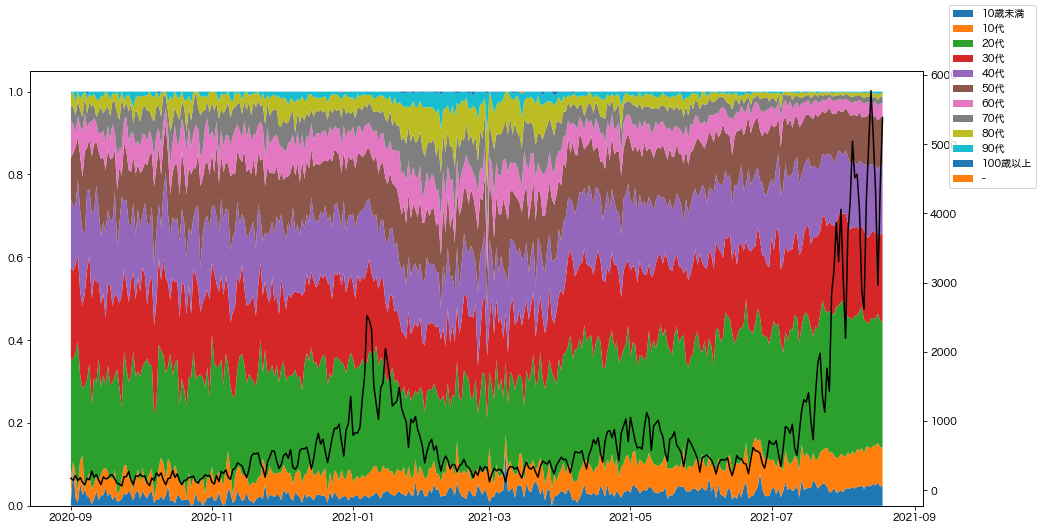

In [3]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.stackplot(cross_df.index, cross_df.drop('All', axis=1).T, labels=['10歳未満', '10代', '20代', '30代', '40代', '50代', '60代', '70代','80代', '90代', '100歳以上', '-'])
ax2.plot(cross_df['All'], color='k')

fig.legend()
